Vanna 是一个开源的基于大模型和 RAG 的 Text2SQL 工具，Vanna 通过结合RAG 框架、大语言模型、高质量的训练数据、持续优化能力、广泛的数据库支持以及开源定制化的特点，实现了在复杂数据集上的高精度表现。

使用 Vanna 可以使用任何的大模型、任何的向量数据库、任何的前端，和任何的关系数据库交互。


Vanna 的工作流程如下所示：
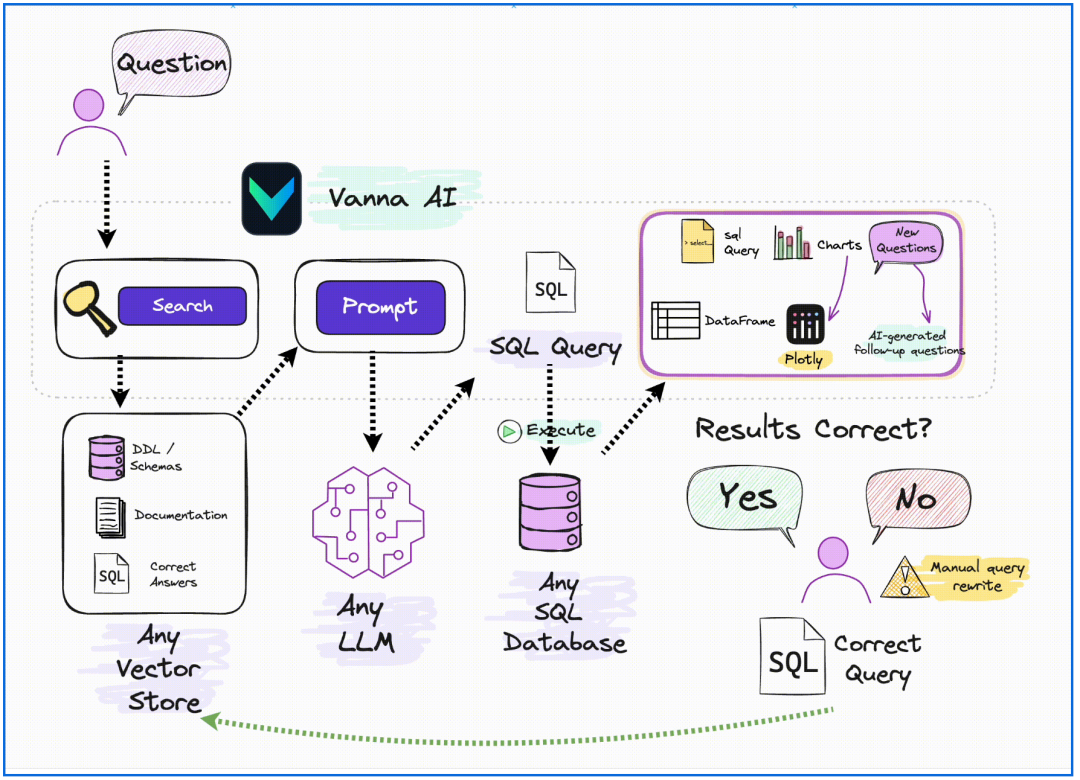

Vanna 的工作分为两个简单步骤：首先，在您的数据上训练一个 RAG “模型”，然后提出问题，系统将返回 SQL 查询，这些查询可以被设置为在您的数据库上自动运行。

第一、在您的数据上训练一个 RAG “模型”。

第二、提出问题（Prompt）。

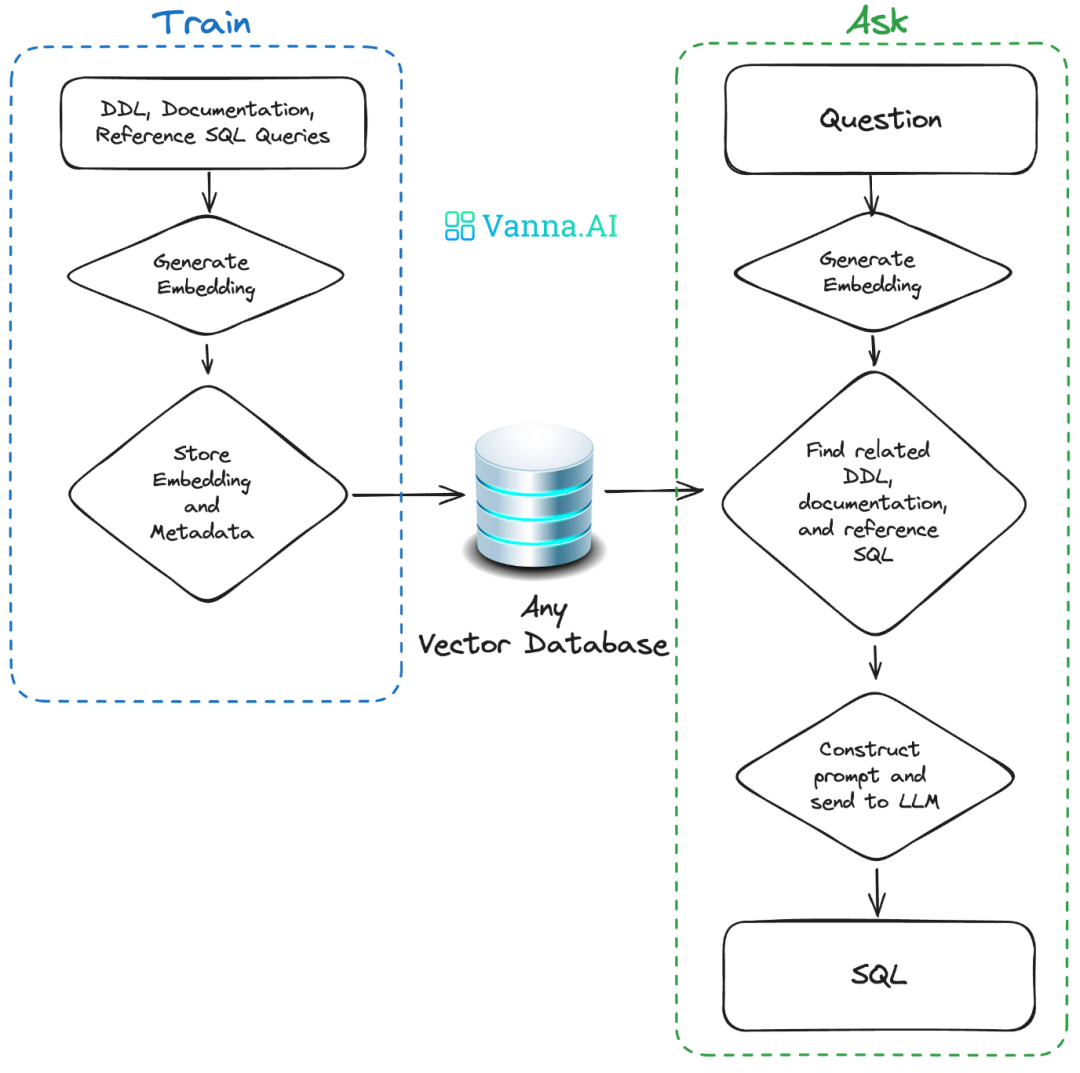

你可以从多个途径开始使用 Vanna，包括：Jupyter Notebook、Slackbot、Web 应用或 Streamlit等。同时，您也可以轻松地将 Vanna集成到您自己的Web 应用中。

如果您只是希望快速体验一下 Vanna 的功能，我们提供了已经训练好的在线大模型和配套的向量数据库供您使用。而最简单快捷的体验方式，就是通过 Colab notebook 来感受 Vanna 的独特魅力。

要使用 Vanna，您需要先注册一个 Vanna 账号（https://vanna.ai/）， 以便获取必要的 API 密钥。

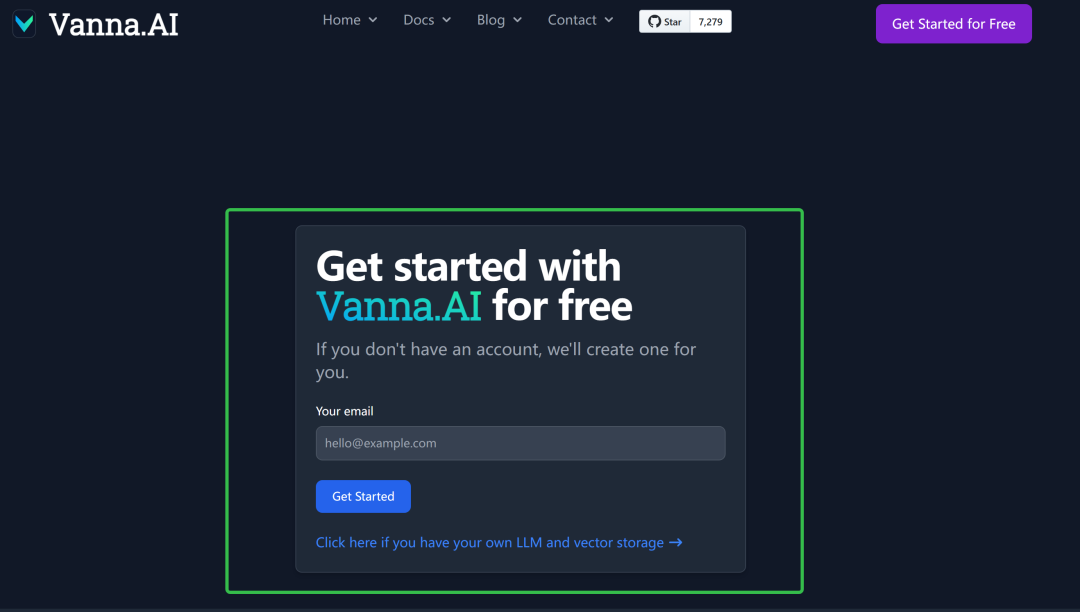

In [2]:
!pip install vanna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.8/177.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00


SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INT

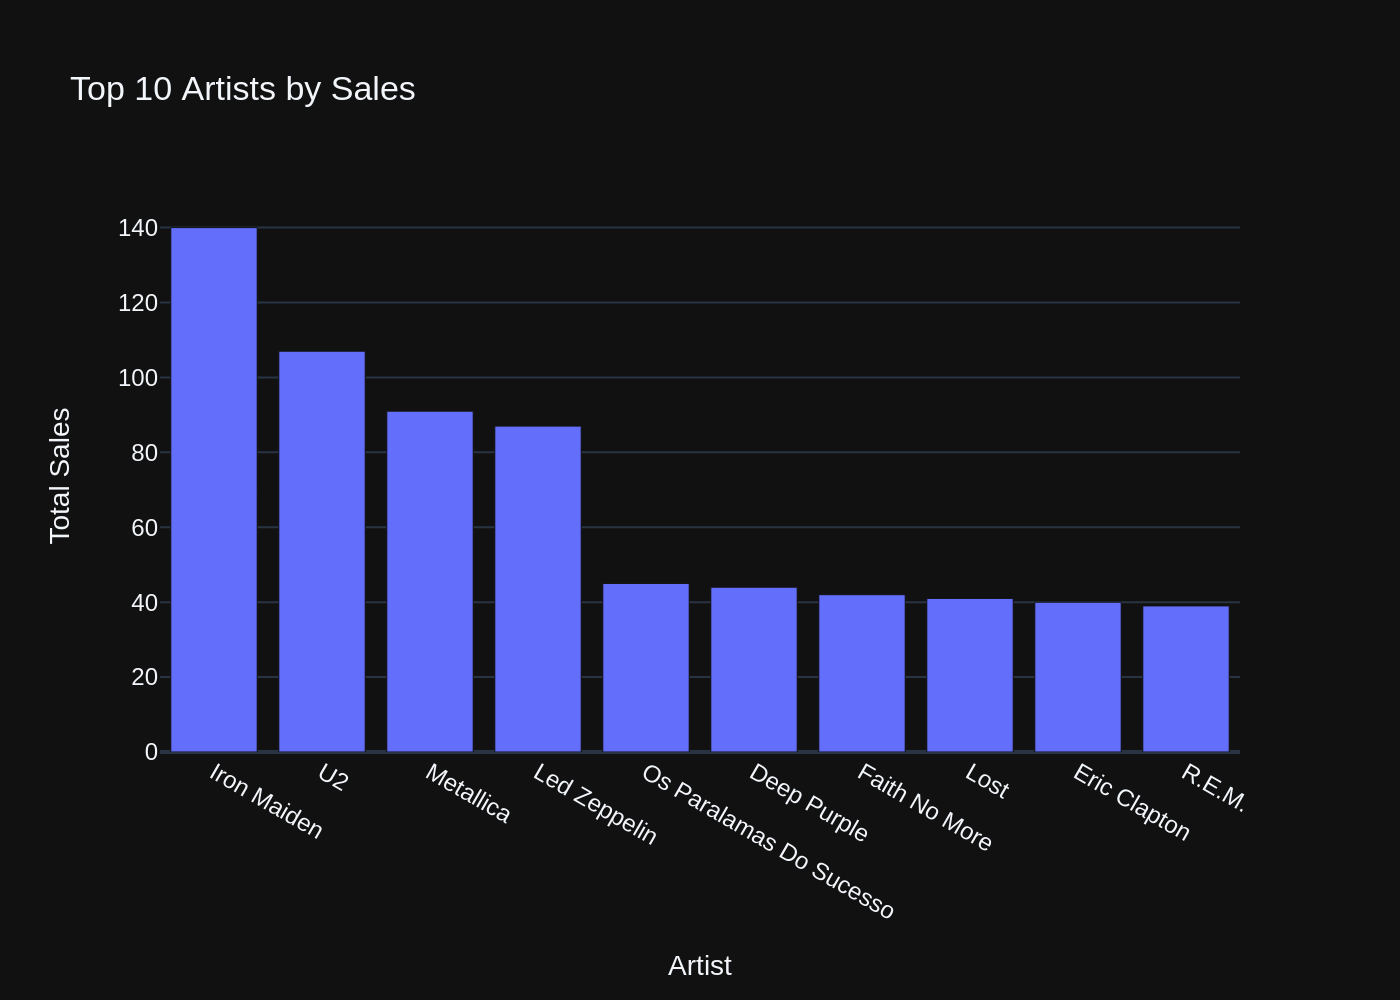

Google Colab doesn't support running websocket servers. Disabling debug mode.


<IPython.core.display.Javascript object>

Your app is running at:
https://qme870e0xb-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off


In [3]:
from vanna.remote import VannaDefault
vn = VannaDefault(model='chinook', api_key='xxx')
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')
vn.ask('What are the top 10 artists by sales?')

from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

In [ ]:
# 连接其他数据库
!pip install vanna

from vanna.remote import VannaDefault
vn = VannaDefault(model='arronai', api_key='xxx')
vn.connect_to_...() # Connect to your database here

from vanna.flask import VannaFlaskApp
VannaFlaskApp(vn).run()

你可以通过以下的代码定制大模型或者向量数据库

In [4]:
!pip install openai chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pypr

In [1]:
# 设置OpenAI KEY环境变量
import os
import getpass
os.environ['OPENAI_API_KEY'] = getpass.getpass('OpenAI API Key:')

OpenAI API Key:··········


In [5]:
# The import statement will vary depending on your LLM and vector database. This is an example for OpenAI + ChromaDB

from vanna.openai.openai_chat import OpenAI_Chat
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

class MyVanna(ChromaDB_VectorStore, OpenAI_Chat):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        OpenAI_Chat.__init__(self, config=config)

vn = MyVanna(config={'model': 'gpt-3.5-turbo'})


# See the documentation for other options

接下来我们来做一个案例演示：

第一步、提问

In [ ]:
vn.ask("What are the top 10 customers by sales?")

SQL Prompt: [{'role': 'system', 'content': "You are a SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. ===Response Guidelines \n1. If the provided context is sufficient, please generate a valid SQL query without any explanations for the question. \n2. If the provided context is almost sufficient but requires knowledge of a specific string in a particular column, please generate an intermediate SQL query to find the distinct strings in that column. Prepend the query with a comment saying intermediate_sql \n3. If the provided context is insufficient, please explain why it can't be generated. \n4. Please use the most relevant table(s). \n5. If the question has been asked and answered before, please repeat the answer exactly as it was given before. \n"}, {'role': 'user', 'content': 'What are the top 10 customers by sales?'}]
Using model gpt-3.5-turbo fo